## Predicting car prices using Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('carprices.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


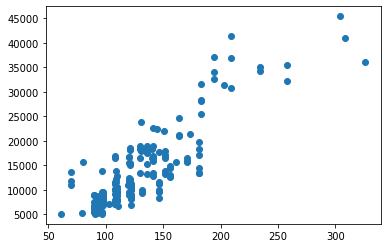

In [3]:
plt.scatter(df.enginesize, df.price)

In [4]:
from sklearn import linear_model

x = np.array(df.enginesize).reshape(-1,1)
y = np.array(df.price)

regr = linear_model.LinearRegression()
regr.fit(x,y)
yhat = regr.predict(x)

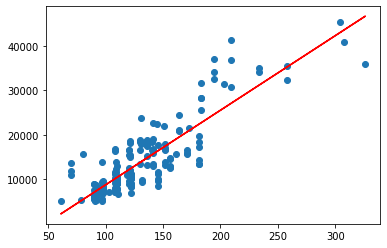

In [5]:
plt.scatter(x,y)
plt.plot(x,yhat,color='r')

In [6]:
# Using sampling to evaluate regression line accuracy (a simple and visual test)
np.where(x==140)

(array([65, 75], dtype=int64), array([0, 0], dtype=int64))

In [7]:
print(f"Actual price: {y[75]}; Predicted price: {yhat[75]}")

Actual price: 16503.0; Predicted price: 15472.3327638989


## Using Multilinear Regression

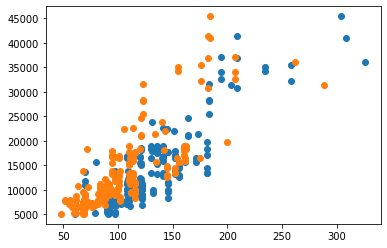

In [8]:
plt.scatter(df.enginesize, df.price)
plt.scatter(df.horsepower, df.price)

In [9]:
x = np.array(df[['enginesize','horsepower']])
y = np.array(df['price'])

regr.fit(x,y)

LinearRegression()

In [10]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -8389.733089315134
Coefficients: 
 [122.44701649  58.84742172]
